# Exploring MNIST And Deep Neural Networks

This Jupyter Notebook is a companion to [this article](), if you found this document some other way and feel you're missing some context, you might wish to read the article. The purpose of this document is to help you learn about deep neural networks and explore how changing the architecture of a neural network impacts the performance of the network.  

Before we can build any neural networks we need to import a few things from Keras and prepare our data. The following code extracts the MNIST dataset, provided by Keras, and flattens the 28x28 pixel images into a vector with length 784. Additionally, it modifies the labels from a numeric value 0-9 to a one-hot encoded vector.

In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step


## A Look At Some Random Digits

It's a good idea to get a sense of the dataset we're working with. Run this code multple times to see new randomly selected digits from the training set. 

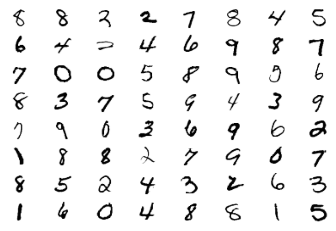

In [2]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

## First Network

Here is a first, simple network, to solve MNIST. It has a single hidden layer with 32 nodes.

In [3]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## Train & Evaluate The Network

This code trains and evaluates the model we defined above. It also uses `matplotlib` and the history object provided by Keras, which tracks how the model behaves through it's training. The history object is worth exploring further, here we are using it to plot training and validation accuracy over time. 

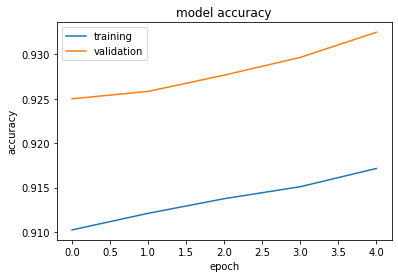

Test loss: 0.312
Test accuracy: 0.913


In [7]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

## Some Helpers

There are a couple of things we're going to do repeatedly in this notebook: 

* Build a model, and
* Evaluate that model. 

These two functions will save us a bit of boilerplate overall. These functions will also help us compare "apples to apples" -- since we can be sure when we call `create_dense` and `evaluate` our models and training regimen will use the same hyperparameters. Both use some of the variables declared above, and both therefore are explicitly intended for working with the MNIST dataset.

`create_dense` accepts an array of layer sizes, and returns a Keras model of a fully connected neural network with the layer sizes specified. `create_dense([32, 64, 128])` will return a deeply connected neural net with three hidden layers, the first with 32 nodes, second with 64 nodes, and third with 128 nodes. 

`create_dense` uses the `image_size` variable declared above, which means it assumes the input data will be a vector with 784 units. All the hidden layers use the sigmoid activation function except the output layer, which uses softmax. 

`evaluate` prints a summary of the model, trains the model, and then prints the loss and accuracy. This function always runs 5 training epochs and uses a fixed batch-size of 128 inputs per batch. It also uses the MNIST data extracted from Keras that we processed above.

In [9]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))

    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


## Comparing Longer Chains

The following code trains and evaluates models with different numbers of hidden layers. All the hidden layers have 32 nodes. The first model has 1 hidden layer, the second as 2 ... up to four layers. 


In [10]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


KeyError: ignored

## Deeper Networks Take Longer To Train

One of the factors at play above is that deeper networks take more time to train. This has to do with backpropogation, gradient descent, and the way optimization algorithms work -- those details are beyoned the scope of this notebook, but consider what happens when we let the 3 layer network that had mediocre performance above train for longer.

In [ ]:
model = create_dense([32, 32, 32])
evaluate(model, epochs=40)

## Comparing Number Of Nodes Per Layer

Another way to add complexity is to add more nodes to each hidden layer. The following code creates several single layer neural networks, with increasingly more nodes in that layer. 

In [11]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


KeyError: ignored

## More Nodes And More Layers

Now that we've looked at the number of nodes and the number of layers in an isolated context, lets look at what happens as we combine these two factors.

In [ ]:
nodes_per_layer = 32
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([nodes_per_layer] * layers)
    evaluate(model, epochs=10*layers)

In [12]:
nodes_per_layer = 128
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([nodes_per_layer] * layers)
    evaluate(model, epochs=10*layers)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


KeyError: ignored

In [ ]:
nodes_per_layer = 512
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([nodes_per_layer] * layers)
    evaluate(model, epochs=10*layers)

## Longer Chains, More Training, Smaller Batches

Sometimes models with several layers need to not only train for longer, but also need more corrections per epoch. By decreasing the batch size, we can increase the number of overall corrections that a model gets. We also ensure it gets more fine grained information by adjusting to error over smaller batches. 

In this case, we can force a model that did not learn well in previous experiments to achieve a moderately respectable 82% accuracy. The performance is still not great, but it's worth mentioning that with patience and computational power we can make a model that looked like total junk perform decently. 

Still our effort would probably be better spent on more promising models. 

In [ ]:
model = create_dense([32] * 5)
evaluate(model, batch_size=16, epochs=50)